In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random

In [2]:
mu = 0
sigma = 1
w = np.random.normal(mu, sigma, 248)

In [3]:
s0 = 100
days = 248  # 248 day year
vol = .157  # daily 1% move on 248 day year, sqrt(248)

In [4]:
def simulate(s0, days, vol, w):
    vals = []
    s = s0
    vals.append(s)
    for i in w:
        s = s * math.exp(-0.5*vol**2 * 1/days + vol * math.sqrt(1/248) * i)
        vals.append(s)
    plt.plot(vals)

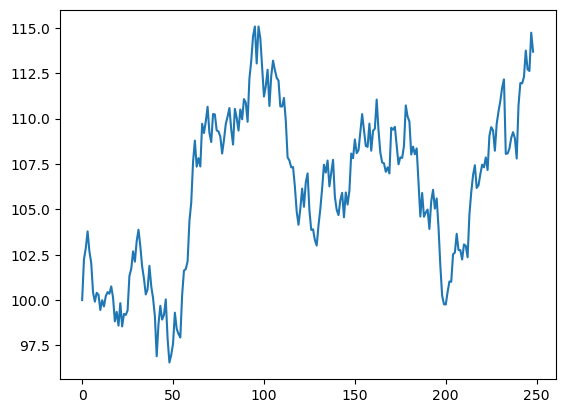

In [5]:
simulate(s0, days, vol, w)

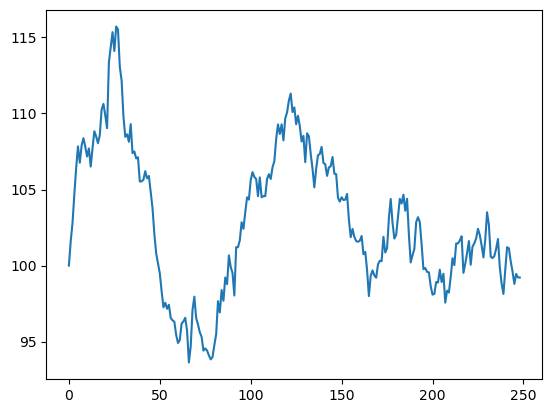

In [6]:
w = np.random.normal(mu, sigma, 248)
simulate(s0, days, vol, w)

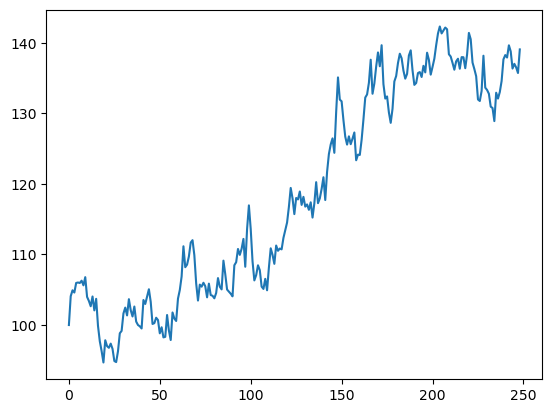

In [7]:
w = np.random.normal(mu, sigma, 248)
simulate(s0, days, .25, w)

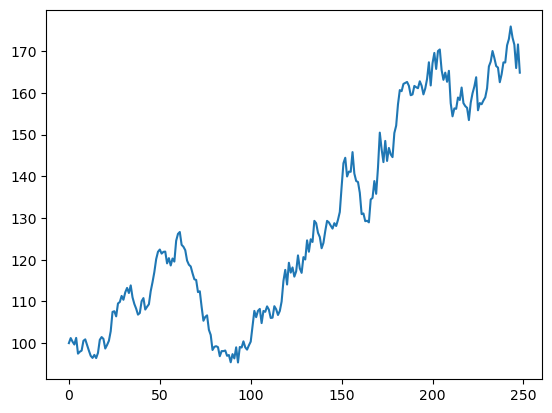

In [8]:
w = np.random.normal(mu, sigma, 248)
simulate(s0, days, .35, w)

In [9]:
cnt = 1024
results = {}

for c in range(0, cnt):
    s = 0
    for i in range(0, 10):
        r = random.choice([-1,1])
        s += r
    if s not in results:
        results[s] = 1
    else:
        results[s] += 1

In [10]:
results

{-4: 119,
 0: 211,
 6: 46,
 2: 222,
 -2: 219,
 4: 131,
 -6: 48,
 -8: 11,
 8: 15,
 10: 1,
 -10: 1}

<BarContainer object of 11 artists>

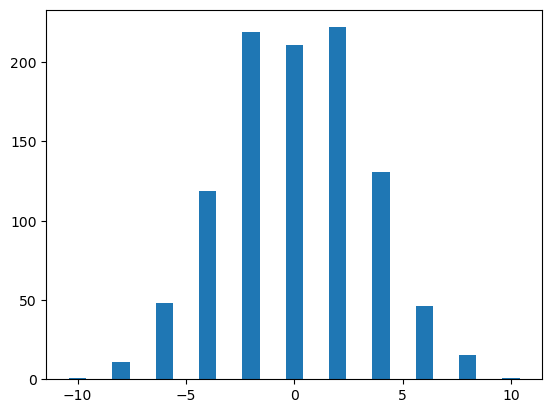

In [11]:
plt.bar(results.keys(), results.values())

# Two-asset Random Walk

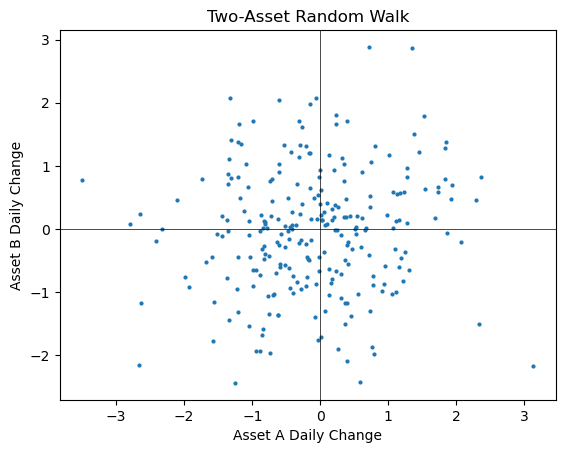

In [27]:
# Set up parameters
num_days = 252
mean = 0
std_dev = 1
initial_prices = np.array([100, 50])

# Generate random walk
daily_changes = np.random.normal(mean, std_dev, size=(num_days, 2))

# Plot results
plt.plot(daily_changes[:, 0], daily_changes[:, 1], 'o', markersize=2)
plt.xlabel('Asset A Daily Change')
plt.ylabel('Asset B Daily Change')
plt.title('Two-Asset Random Walk')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.show()

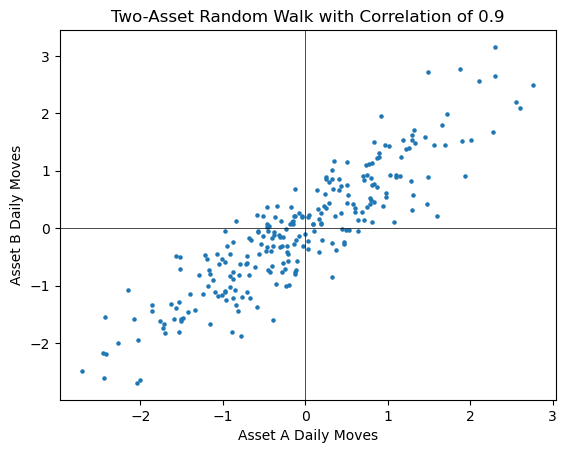

In [30]:
num_days = 252
mean = 0
std_dev = 1
initial_prices = np.array([100, 50])
correlation = 0.9

# Generate random walk with correlated random variables
covariance = np.array([[std_dev**2, correlation*std_dev**2],
                       [correlation*std_dev**2, std_dev**2]])
daily_moves = np.random.multivariate_normal([mean, mean], covariance, size=num_days)

# Calculate prices
prices = np.zeros((num_days+1, 2))
prices[0] = initial_prices

for i in range(num_days):
    prices[i+1] = prices[i] + daily_moves[i]

# Plot results
plt.scatter(daily_moves[:, 0], daily_moves[:, 1], s=5)
plt.xlabel('Asset A Daily Moves')
plt.ylabel('Asset B Daily Moves')
plt.title('Two-Asset Random Walk with Correlation of 0.9')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.show()

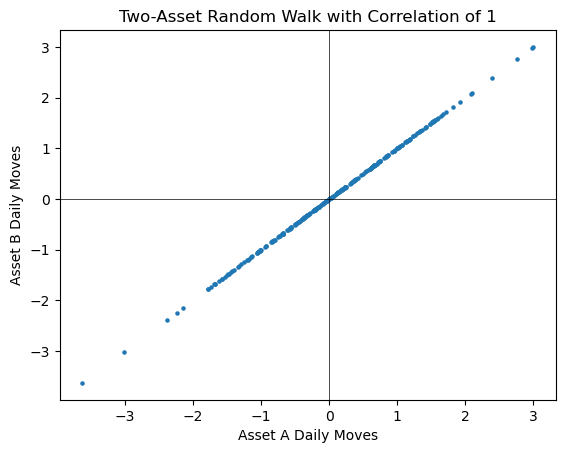

In [31]:
num_days = 252
mean = 0
std_dev = 1
initial_prices = np.array([100, 50])
correlation = 1

# Generate random walk with correlated random variables
covariance = np.array([[std_dev**2, correlation*std_dev**2],
                       [correlation*std_dev**2, std_dev**2]])
daily_moves = np.random.multivariate_normal([mean, mean], covariance, size=num_days)

# Calculate prices
prices = np.zeros((num_days+1, 2))
prices[0] = initial_prices

for i in range(num_days):
    prices[i+1] = prices[i] + daily_moves[i]

# Plot results
plt.scatter(daily_moves[:, 0], daily_moves[:, 1], s=5)
plt.xlabel('Asset A Daily Moves')
plt.ylabel('Asset B Daily Moves')
plt.title('Two-Asset Random Walk with Correlation of 1')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.show()

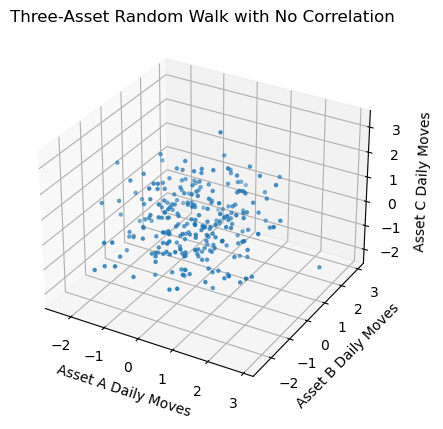

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up parameters
num_days = 252
mean = 0
std_dev = 1
initial_prices = np.array([100, 50, 75])

# Generate random walk with uncorrelated random variables
covariance = np.identity(3) * std_dev**2
daily_moves = np.random.multivariate_normal([mean, mean, mean], covariance, size=num_days)

# Calculate prices
prices = np.zeros((num_days+1, 3))
prices[0] = initial_prices

for i in range(num_days):
    prices[i+1] = prices[i] + daily_moves[i]

# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(daily_moves[:, 0], daily_moves[:, 1], daily_moves[:, 2], s=5)
ax.set_xlabel('Asset A Daily Moves')
ax.set_ylabel('Asset B Daily Moves')
ax.set_zlabel('Asset C Daily Moves')
ax.set_title('Three-Asset Random Walk with No Correlation')
plt.show()
